<a href="https://colab.research.google.com/github/jupitershot/formula_one_data_analysis/blob/master/F1%2Bbest%2Bdriver%2Bsampling%2BIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F1 best driver analysis
Analysis takes data from 1950 to 2017 season.

Data source : https://www.kaggle.com/cjgdev/formula-1-race-data-19502017#results.csv

### Objectives:
1. Sample the data
2. From sampe, identify the best driver that ever raced

## Import the data

In [0]:
#Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Increase number of rows and columns displayed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
#Import data
df_results = pd.read_csv("results.csv")
df_drivers = pd.read_csv("drivers.csv",encoding ='ISO-8859-1')
df_constructor = pd.read_csv("constructors.csv")
df_races = pd.read_csv("races.csv")
df_status = pd.read_csv("status.csv")

## Exploratory Data Analysis

#### Inspect the shape of the data

In [0]:
#Check number of rows and columns
print('The drivers rows and columns are', df_drivers.shape)
print('The results rows and columns are', df_results.shape)
print('The constructors rows and columns are', df_constructor.shape)
print('The races rows and columns are', df_races.shape)

The drivers rows and columns are (842, 9)
The results rows and columns are (23777, 18)
The constructors rows and columns are (208, 6)
The races rows and columns are (997, 8)


#### Inspect the actual data in the datasets

In [0]:
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [0]:
#Results
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [0]:
#Teams
df_constructor.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


In [0]:
#Races
df_races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [0]:
#Status
df_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


#### Merge the datasets and create dataframe with only necessary columns

In [0]:
#Merge the driver and results datasets so as to see the driver name
df_driver_rank = df_drivers.merge(df_results, on='driverId')
#Merge constructors i.e teams names into combined dataframe
df_dr_rank_const = df_driver_rank.merge(df_constructor, on='constructorId')
#Merge race names into combined dataframe
df_race_results_const = df_dr_rank_const.merge(df_races, on='raceId')
#Merge status into combined dataframe
df_race_results = df_race_results_const.merge(df_status, on='statusId')

In [0]:
#Validate if number of rows of merged dataset is same as results to ensure no crossjoin.
df_race_results.shape

(23777, 39)

In [0]:
df_race_results.head()

,driverId,driverRef,number_x,code,forename,surname,dob,nationality_x,url_x,resultId,raceId,constructorId,number_y,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,name_x,nationality_y,url_y,Unnamed: 5,year,round,circuitId,name_y,date,time_y,url,status
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Finished
1,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,5,18,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Finished
2,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2,18,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Finished
3,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg,3,18,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Finished
4,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,4,18,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Finished


In [0]:
#Create a dataframe with only the relevant columns
df = df_race_results[["resultId", "driverId","raceId","constructorId","forename","surname","year","name_x","name_y","grid","position","status","nationality_x"]]
df = df.copy()  # Copied to eliminate error encountered in late operations "/home/ken/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning:  A value is trying to be set on a copy of a slice from a DataFrame""
df.rename(columns={'forename':'first_name','surname':'last_name',"nationality_x":"nationality",'name_x':'team','name_y':'race'}, inplace=True)
df.head()

,resultId,driverId,raceId,constructorId,first_name,last_name,year,team,race,grid,position,status,nationality
0,1,1,18,1,Lewis,Hamilton,2008,McLaren,Australian Grand Prix,1,1.0,Finished,British
1,5,5,18,1,Heikki,Kovalainen,2008,McLaren,Australian Grand Prix,3,5.0,Finished,Finnish
2,2,2,18,2,Nick,Heidfeld,2008,BMW Sauber,Australian Grand Prix,5,2.0,Finished,German
3,3,3,18,3,Nico,Rosberg,2008,Williams,Australian Grand Prix,7,3.0,Finished,German
4,4,4,18,4,Fernando,Alonso,2008,Renault,Australian Grand Prix,11,4.0,Finished,Spanish


#### Clean Data

In [0]:
#Check null records
df.isnull().sum()

resultId             0
driverId             0
raceId               0
constructorId        0
first_name           0
last_name            0
year                 0
team                 0
race                 0
grid                 0
position         10550
status               0
nationality          0
dtype: int64

In [0]:
#Populate null records with -1 as they did not finish the race
df["position"].fillna(value=-1)
df.isnull().sum()

resultId             0
driverId             0
raceId               0
constructorId        0
first_name           0
last_name            0
year                 0
team                 0
race                 0
grid                 0
position         10550
status               0
nationality          0
dtype: int64

## Feature Engineering

a) Points Feature

In [0]:
#Assign the points for positions 1 to 10 evenly based on current F1 scoring system
#Reason: Points awarding mechanism has changed over years hence we cannot rely on 
#scoring which is in the dataset. Details https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems

def assign_points():
# Create a list to store the data
    points = []

    # For each row in the column,
    for position in df['position']:
        if position == 1.0:
            points.append(25)
        elif position == 2.0:
            points.append(18)
        elif position == 3.0:
            points.append(15)
        elif position == 4.0:
            points.append(12)
        elif position == 5.0:
            points.append(10)    
        elif position == 6.0:
            points.append(8)    
        elif position == 7.0:
            points.append(6)
        elif position == 8.0:
            points.append(4)
        elif position == 9.0:
            points.append(2)
        elif position == 10:
            points.append(1)
        else:
            points.append(0)
        
    # Create a column from the list
    df['points'] = points

In [0]:
#Execute the procedure above
assign_points()

In [0]:
df.head()

,resultId,driverId,raceId,constructorId,first_name,last_name,year,team,race,grid,position,status,nationality,points
0,1,1,18,1,Lewis,Hamilton,2008,McLaren,Australian Grand Prix,1,1.0,Finished,British,25
1,5,5,18,1,Heikki,Kovalainen,2008,McLaren,Australian Grand Prix,3,5.0,Finished,Finnish,10
2,2,2,18,2,Nick,Heidfeld,2008,BMW Sauber,Australian Grand Prix,5,2.0,Finished,German,18
3,3,3,18,3,Nico,Rosberg,2008,Williams,Australian Grand Prix,7,3.0,Finished,German,15
4,4,4,18,4,Fernando,Alonso,2008,Renault,Australian Grand Prix,11,4.0,Finished,Spanish,12


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23777 entries, 0 to 23776
Data columns (total 15 columns):
resultId         23777 non-null int64
driverId         23777 non-null int64
raceId           23777 non-null int64
constructorId    23777 non-null int64
first_name       23777 non-null object
last_name        23777 non-null object
year             23777 non-null int64
team             23777 non-null object
race             23777 non-null object
grid             23777 non-null int64
position         13227 non-null float64
status           23777 non-null object
nationality      23777 non-null object
points           23777 non-null int64
strata           23777 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 2.9+ MB


b) Strata

In [0]:
#Procedure to assign strata based on year
def assign_strata():
# Create a list to store the data
    strata = []

    # For each row in the column,
    for year in df['year']:
        if year >= 1950 and year <= 1957:
            strata.append(1)      
        elif year >= 1958 and year <=1961:
            strata.append(2)
        elif year >= 1962 and year <=1967:
            strata.append(3)
        elif year >=1968 and year<= 1976:
            strata.append(4)
        elif year >=1977 and year<= 1982:
            strata.append(5)    
        elif year >=1983 and year<= 1988:
            strata.append(6)    
        elif year >=1989 and year<= 1993:
            strata.append(7)
        elif year >=1994 and year<= 1999:
            strata.append(8)
        elif year >=2000 and year<= 2004:
            strata.append(9)
        elif year >=2005 and year<= 2008:
            strata.append(10)
        elif year >=2009 and year<= 2013:
            strata.append(11)
        elif year >=2014 and year<= 2017:
            strata.append(12)
    # Create a column from the list
    df['strata'] = strata

In [0]:
assign_strata()

In [0]:
#Count of records per strata
df.groupby(by='strata').strata.count()

strata
1     1571
2      878
3     1259
4     2865
5     2648
6     2586
7     2591
8     2279
9     1789
10    1514
11    2150
12    1647
Name: strata, dtype: int64

In [0]:
df.head()

,resultId,driverId,raceId,constructorId,first_name,last_name,year,team,race,grid,position,status,nationality,points,strata
0,1,1,18,1,Lewis,Hamilton,2008,McLaren,Australian Grand Prix,1,1.0,Finished,British,25,10
1,5,5,18,1,Heikki,Kovalainen,2008,McLaren,Australian Grand Prix,3,5.0,Finished,Finnish,10,10
2,2,2,18,2,Nick,Heidfeld,2008,BMW Sauber,Australian Grand Prix,5,2.0,Finished,German,18,10
3,3,3,18,3,Nico,Rosberg,2008,Williams,Australian Grand Prix,7,3.0,Finished,German,15,10
4,4,4,18,4,Fernando,Alonso,2008,Renault,Australian Grand Prix,11,4.0,Finished,Spanish,12,10


## Sampling

In [0]:
#Check the drive counts
df['strata'].value_counts().sort_values()

2      878
3     1259
10    1514
1     1571
12    1647
9     1789
11    2150
8     2279
6     2586
7     2591
5     2648
4     2865
Name: strata, dtype: int64

#### Random sampling across the whole population

In [0]:
# Non stratified sample
non_strat_output = df.sample(frac=0.1) 

# check the proportion of the non_stratified sample
print(non_strat_output['strata'].value_counts())

4     296
6     283
5     256
7     242
8     234
11    218
12    172
9     170
1     168
10    129
3     121
2      89
Name: strata, dtype: int64


### Stratified sampling

#### Sample Size Determination
Approaches

a) Use 10 percent of records per strata

b) Use Cochran’s Formula 
Approach a selected due to ease of application.

In [0]:
# Stratified sample
df_strat = df.groupby('strata', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.127))

# Counts per strata
df_output = df_strat['strata'].value_counts().sort_values()
df_output[:]

2     112
3     160
10    192
1     200
12    209
9     227
11    273
8     289
6     328
7     329
5     336
4     364
Name: strata, dtype: int64

## Normality Tests

### a) Distribution of count per strata for whole population versus sample

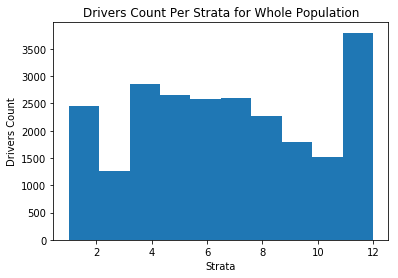

In [0]:
# histogram plot of whole population per strata
plt.hist(df['strata'])
plt.xlabel("Strata")
plt.ylabel("Drivers Count")
plt.title("Drivers Count Per Strata for Whole Population")
plt.show()

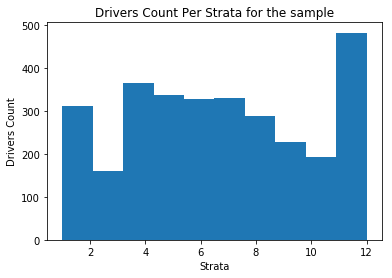

In [0]:
# histogram plot of whole population per strata
plt.hist(df_strat['strata'])
plt.xlabel("Strata")
plt.ylabel("Drivers Count")
plt.title("Drivers Count Per Strata for the sample")
plt.show()

### b) Distribution of drivers scores per whole population versus sample

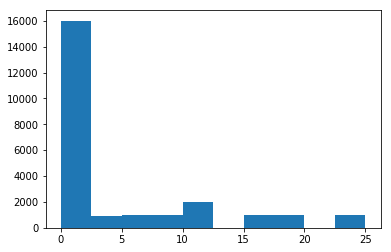

In [0]:
# histogram plot of whole population per strata
plt.hist(df['points'])
plt.show()

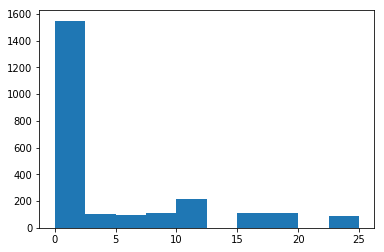

In [0]:
# histogram plot of whole population per strata
plt.hist(df_strat['points'])
plt.show()

#### c) Nationality Distribution

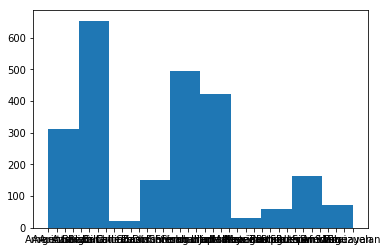

In [0]:
# histogram plot of whole population per strata
plt.hist(df_strat['nationality'])
plt.show()

#### d)Points per driver ID

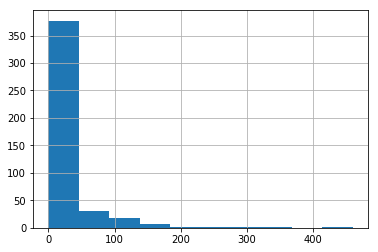

In [0]:
df_strat[['driverId','points']].groupby(by='driverId').points.sum().hist()
plt.show()

#### d) Descriptive statistics

In [0]:
#Standard Deviation and mean for whole population - Of interest is grid, position and points
df.describe()

,resultId,driverId,raceId,constructorId,year,grid,position,points,strata
count,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000,13227.000000,23777.000000,23777.000000
mean,11889.481053,226.515961,487.203937,46.281785,1987.675064,11.270303,7.782264,4.141565,6.659545
std,6864.691322,231.386102,269.904857,56.174091,17.972231,7.346436,4.745105,6.804586,3.133773
min,1.000000,1.000000,1.000000,1.000000,1950.000000,0.000000,1.000000,0.000000,1.000000
25%,5945.000000,55.000000,273.000000,6.000000,1975.000000,5.000000,4.000000,0.000000,4.000000
50%,11889.000000,154.000000,478.000000,25.000000,1989.000000,11.000000,7.000000,0.000000,7.000000
75%,17833.000000,314.000000,718.000000,57.000000,2003.000000,17.000000,11.000000,6.000000,9.000000
max,23781.000000,843.000000,988.000000,210.000000,2017.000000,34.000000,33.000000,25.000000,12.000000


In [0]:
#Standard Deviation and mean for sample - Of interest is grid, position and points
df_strat.describe()

,resultId,driverId,raceId,constructorId,year,grid,position,points,strata
count,2378.000000,2378.000000,2378.00000,2378.000000,2378.000000,2378.000000,1336.000000,2378.000000,2378.000000
mean,11913.983600,224.434399,487.55635,45.681665,1987.671573,11.448696,7.889222,4.008831,6.659798
std,6881.570735,228.479447,269.15464,55.775853,17.990280,7.302072,4.640774,6.623819,3.134469
min,34.000000,1.000000,1.00000,1.000000,1950.000000,0.000000,1.000000,0.000000,1.000000
25%,5876.500000,55.000000,275.25000,6.000000,1975.000000,5.000000,4.000000,0.000000,4.000000
50%,11853.500000,155.000000,476.00000,24.000000,1989.000000,11.000000,7.000000,0.000000,7.000000
75%,17878.500000,312.000000,716.00000,56.000000,2002.000000,17.000000,11.000000,6.000000,9.000000
max,23778.000000,840.000000,988.00000,210.000000,2017.000000,33.000000,27.000000,25.000000,12.000000


NOTE: Mean and standard deviation for sample versus population similar for grid, position 
and points.
This means our sample is representative of the whole population.

### Analysis

In [0]:
df_strat[['first_name','last_name','points']].groupby(by=['first_name','last_name']).points.sum().sort_values(ascending=False)

first_name         last_name     
Michael            Schumacher        495
Lewis              Hamilton          413
Kimi               RÌ_ikkÌ¦nen       366
Fernando           Alonso            357
Ayrton             Senna             283
Alain              Prost             274
Nico               Rosberg           268
Nelson             Piquet            263
Sebastian          Vettel            262
Jenson             Button            250
Mark               Webber            248
Rubens             Barrichello       237
Jacques            Villeneuve        215
Damon              Hill              212
Jody               Scheckter         208
Mika               HÌ_kkinen         199
Felipe             Massa             197
David              Coulthard         171
Bruce              McLaren           170
Jean               Alesi             148
Niki               Lauda             147
Giancarlo          Fisichella        142
Jack               Brabham           134
Jackie             Stew